In [1]:
from torchvision.utils import save_image
import pandas as pd
from PIL import Image

from osgeo import gdal, osr, ogr

import os

import matplotlib.pyplot as plt
import numpy as np
import torch

from gtif import *
from dataPreprocess import *

c:\users\mouju\appdata\local\programs\python\python38\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
RE = 6371000 #radius of earth

In [3]:
a = np.array([[1,2],[3,4]])

In [4]:
b = np.array([5,6])

In [5]:
np.concatenate((a, b[np.newaxis, :]), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [6]:
df = pd.read_csv(r"C:\Users\mouju\Desktop\film\components_analysis\df_unique.csv", header=[0])

In [7]:
project_df(df)

In [8]:
df.borehole = df.borehole.str.replace('//', '--')

In [9]:
chips_root = r"C:\Users\mouju\Desktop\film\raster_chips"

if not os.path.exists(chips_root):
    os.makedirs(chips_root)

In [10]:
data_root = r"C:\Users\mouju\Desktop\film\hds"

In [11]:
file = 'ld.tif'
ds = gdal.Open(os.path.join(data_root, file))
ulx, xres, xskew, uly, yskew, yres  = ds.GetGeoTransform()

band = ds.GetRasterBand(1)
arr = band.ReadAsArray()

In [12]:
df = crop_df_hds(df)

In [13]:
len(df)

163

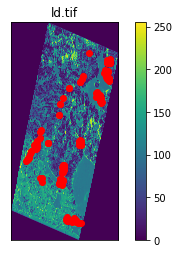

In [14]:
# plt.fig()
plt.imshow(arr)
plt.colorbar()
plt.title(file)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

x_scatter = (df.longitude - ulx) / xres
y_scatter = (uly - df.latitude)/(-yres)
plt.scatter(x_scatter, y_scatter,c='r')
plt.show()

# ARCTICDEM

In [15]:
chip_size = 128

In [16]:
data_root = r"C:\Users\mouju\Desktop\film\saga_data"

In [17]:
n_channels = len(os.listdir(data_root)) // 2

In [18]:
base_lat = 70
base_lng = -135

In [19]:
xres * RE

473.27769875

In [20]:
yres*RE

-119.06411494999999

In [21]:
# lenght along meridians
pixel_len_lat = 5/180 * np.pi /6000 * RE # in meters
chip_size_m = 5000 # chip size in meters
chip_size_lat = round(chip_size_m/pixel_len_lat/2) * 2 # making sure chip_size is even

In [35]:
n_pixels = 10000
base_x = -2399995
preloaded = np.zeros([n_channels, n_pixels, n_pixels*2])
file_list = os.listdir(data_root)

In [23]:
file_list

['dem_17.tif',
 'dem_18.tif',
 'insolation_17.tif',
 'insolation_18.tif',
 'twi_17.tif',
 'twi_18.tif']

In [24]:
for i in range(n_channels):
    # name = file.split('_')[0]
    # print(name)
    f_17 = os.path.join(data_root, file_list[i*2])
    f_18 = os.path.join(data_root, file_list[i*2 + 1])
    
    arr17, _, _ = read_geotiff(f_17, 1)
    arr18, _, _ = read_geotiff(f_18, 1)
    
    preloaded[i, :, 0:10000] = arr17
    preloaded[i,:, 10000:20000] = arr18

In [25]:
df

,latitude,longitude,time,borehole,depth,frozen,cryostructures,visible_ice,ASTM_2488,materials,organic_cover,top_of_interval,bottom_of_interval,month,year,month_cyclic,visible_ice_code,proj_x,proj_y
108,68.57269,-133.59933,2012-04-08T00:00:00Z,2.45-1-1,3.350,1,Vx,Low,NaN,Silt,0.00,2.70,4.0,4,2012,4,1,-2.346805e+06,-57382.140821
109,68.57301,-133.60501,2012-04-08T00:00:00Z,2.45-1-11,3.150,1,NaN,No visible ice,NaN,Till,0.20,0.20,6.1,4,2012,4,0,-2.346775e+06,-57148.617794
110,68.57271,-133.60709,2012-04-09T00:00:00Z,2.45-1-12,1.125,1,NaN,High,NaN,Silt,0.15,0.15,2.1,4,2012,4,3,-2.346811e+06,-57064.240285
111,68.57582,-133.60138,2012-04-09T00:00:00Z,2.45-1-13,0.975,1,NaN,High,NaN,Till,0.15,0.15,1.8,4,2012,4,3,-2.346457e+06,-57289.613424
112,68.57559,-133.60481,2012-04-09T00:00:00Z,2.45-1-15,1.125,1,NaN,Medium to high,ORGANICS,Organics,1.60,0.15,2.1,4,2012,4,2,-2.346486e+06,-57149.770681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,68.61559,-133.68794,2013-04-01T00:00:00Z,W14103137-CR17aS,0.050,0,NaN,No visible ice,ORGANICS,Organics,2.40,0.00,0.1,4,2013,4,0,-2.342086e+06,-53642.591692
524,68.63245,-133.65169,2013-04-15T00:00:00Z,W14103137-CR18N,0.900,1,NaN,Low,PEAT,Organics,1.80,0.00,1.8,4,2013,4,1,-2.340163e+06,-55079.929840
525,68.63230,-133.65213,2013-04-15T00:00:00Z,W14103137-CR18S,0.900,1,NaN,High,PEAT,Organics,1.80,0.00,1.8,4,2013,4,3,-2.340180e+06,-55062.353966
526,68.63923,-133.60542,2013-04-08T00:00:00Z,W14103137-CR21N,0.300,0,NaN,No visible ice,NaN,Silt,0.00,0.00,0.6,4,2013,4,0,-2.339358e+06,-56951.256687


In [36]:
for _, row in df.iterrows():
    
    x = row.at['proj_x']
    y = row.at['proj_y']
    bh = row.borehole

    pixel_len = 10


    # (df17.proj_x + 2400000) / 10, (-df17.proj_y)/10

    x_start = np.round((x - base_x) / pixel_len - chip_size/2).astype(int)
    x_end = x_start + chip_size

    y_start = np.round((- y) / pixel_len - chip_size/2).astype(int)
    y_end = y_start + chip_size
    
#     print(x, base_x)
#     print(x - base_x)
    print(x_start,x_end,y_start,y_end)


    image= preloaded[:, y_start:y_end, x_start:x_end]
    
    with open(os.path.join(chips_root, f'{bh}.npy'), 'wb') as f:
        np.save(f, image)
    

5255 5383 5674 5802
5258 5386 5651 5779
5254 5382 5642 5770
5290 5418 5665 5793
5287 5415 5651 5779
5285 5413 5644 5772
5298 5426 5640 5768
5257 5385 5664 5792
5298 5426 5658 5786
5309 5437 5653 5781
5303 5431 5663 5791
5306 5434 5675 5803
5258 5386 5655 5783
5266 5394 5658 5786
5265 5393 5666 5794
5264 5392 5675 5803
5272 5400 5675 5803
5270 5398 5664 5792
5273 5401 5654 5782
4849 4977 5015 5143
4855 4983 4971 5099
4810 4938 5008 5136
5798 5926 5352 5480
6032 6160 5665 5793
6066 6194 5680 5808
6342 6470 5786 5914
4357 4485 5476 5604
4359 4487 5457 5585
4365 4493 5434 5562
4374 4502 5441 5569
4391 4519 5449 5577
4401 4529 5451 5579
5869 5997 5912 6040
5870 5998 5931 6059
5862 5990 5939 6067
5842 5970 5922 6050
5828 5956 5915 6043
5849 5977 5958 6086
5836 5964 5977 6105
5823 5951 5981 6109
5822 5950 5995 6123
5813 5941 5971 6099
5807 5935 6003 6131
5801 5929 5975 6103
5794 5922 5995 6123
5782 5910 5988 6116
5783 5911 6006 6134
5770 5898 6000 6128
5834 5962 5931 6059
5770 5898 6013 6141


In [39]:
for file in os.listdir(chips_root):
    with open(os.path.join(chips_root, file), 'rb') as f:
        a = np.load(f)
        print(a.shape)
    

(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 12

In [38]:
a.shape

(3, 128, 128)

In [ ]:

# for i, file in enumerate(os.listdir(data_root)):
    
#     ds = gdal.Open(os.path.join(data_root, file))
#     band = ds.GetRasterBand(1)
#     arr = band.ReadAsArray()
    
#     plt.imshow(np.log(arr))
#     plt.colorbar()
#     plt.title('log of ' + file)
#     ax = plt.gca()
#     ax.get_yaxis().set_visible(False)
#     ax.get_xaxis().set_visible(False)
#     # plt.savefig(os.path.join(data_thumbnails, file))
    
#     sub_path = os.path.join(chips_geo90, file)
    
#     if not os.path.exists(sub_path):
#         os.makedirs(sub_path)                   

#     for index, row in df.iterrows():
        
#         lat = row.latitude
#         lng = row.longitude
#         bh = row.borehole
#         # print(bh)
        
#         lat_index_start = np.round((base_lat - lat) / pixel_len_lat - chip_size_lat/2).astype(int)
#         lat_index_end = lat_index_start + chip_size_lat
        
#         pixel_len_lng = np.cos(lat/180 * np.pi)
#         chip_size_lng = round(5000/pixel_len_lng/2) * 2
        
#         lng_index_start = np.round((lng - base_lng) / pixel_len_lng - chip_size_lng/2).astype(int)
#         lng_index_end = lng_index_start + chip_size_lng
        
#         image = arr[lat_index_start:lat_index_end,lng_index_start:lng_index_end]
        
#         with open(os.path.join(sub_path, f'{bh}.npy'), 'wb') as f:
#             np.save(f, image)
    
#     print(file)